# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [117]:
import os
import pandas as pd
import numpy as np
import re
import seaborn
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

if os.getenv("PUIDATA"):
    data_path = os.getenv("PUIDATA")
else:
    os.system('mkdir data')
    data_path = "./data"
    
%matplotlib inline

In [2]:
csv311 = data_path + "/311.csv"

In [12]:
# Download 311 data
# Using custom Socrata view to only export 2015 data
os.system("curl -o " + csv311 + " http://cosmo.nyu.edu/~fb55/PUI2016/data/311_Service_Requests_from_2010_to_Present.csv")

0

In [13]:
df311 = pd.read_csv(csv311)

/Users/pichot/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [10]:
df311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,34212771,09/01/2016 12:00:06 AM,09/01/2016 06:02:10 AM,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,11413.0,137-47 CARSON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675208,-73.754949,"(40.67520813178531, -73.75494944502233)"
1,34212392,09/01/2016 12:00:35 AM,09/02/2016 04:53:48 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10469.0,943 EAST 217 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.879986,-73.856707,"(40.87998640855491, -73.85670741555177)"
2,34214520,09/01/2016 12:00:37 AM,09/01/2016 01:05:43 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11369.0,98-02 25 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.764632,-73.871623,"(40.76463242381882, -73.87162284918391)"
3,34212483,09/01/2016 12:00:54 AM,09/01/2016 03:15:32 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,1017 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.885559,-73.850782,"(40.885558858976104, -73.85078238918491)"
4,34214231,09/01/2016 12:01:15 AM,09/06/2016 09:27:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,10040.0,4700 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.864140,-73.929501,"(40.864140093130686, -73.92950060219349)"


In [14]:
len(df311)

34897

In [15]:
df311.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [16]:
# Check if all Boroughs and Community Districts are represented in the Data
df311["Community Board"].unique()

array(['13 QUEENS', '12 BRONX', '03 QUEENS', '12 MANHATTAN',
       '09 MANHATTAN', '08 QUEENS', '01 QUEENS', '07 BRONX', '01 BROOKLYN',
       '03 MANHATTAN', '09 QUEENS', '05 BRONX', '03 BROOKLYN',
       '07 MANHATTAN', '12 BROOKLYN', '0 Unspecified', '09 BROOKLYN',
       '07 QUEENS', '15 BROOKLYN', '08 MANHATTAN', '10 BROOKLYN',
       '08 BROOKLYN', '04 MANHATTAN', '02 MANHATTAN', '12 QUEENS',
       '04 BRONX', '04 BROOKLYN', '01 BRONX', 'Unspecified MANHATTAN',
       '10 QUEENS', '18 BROOKLYN', '11 BROOKLYN', '10 MANHATTAN',
       '11 QUEENS', '16 BROOKLYN', '05 BROOKLYN', '05 MANHATTAN',
       '55 BROOKLYN', '08 BRONX', '09 BRONX', '17 BROOKLYN',
       '01 MANHATTAN', '05 QUEENS', '06 QUEENS', '02 BRONX', '11 BRONX',
       '04 QUEENS', 'Unspecified BROOKLYN', '02 QUEENS',
       '01 STATEN ISLAND', '03 STATEN ISLAND', '14 BROOKLYN',
       '07 BROOKLYN', '02 STATEN ISLAND', '10 BRONX', '11 MANHATTAN',
       '06 BROOKLYN', '13 BROOKLYN', '06 MANHATTAN', 'Unspecified BRONX

In [17]:
# Remove all unspecified community boards
df311 = df311[~df311["Community Board"].str.contains('Unspecified')]

In [18]:
df311 = df311[df311["Community Board"] != "BRONX"]
df311 = df311[df311["Community Board"] != "BROOKLYN"]
df311 = df311[df311["Community Board"] != "MANHATTAN"]
df311 = df311[df311["Community Board"] != "QUEENS"]
df311 = df311[df311["Community Board"] != "STATEN ISLAND"]

In [19]:
df311 = df311[df311["Community Board"] != "26 BRONX"]
df311 = df311[df311["Community Board"] != "27 BRONX"]
df311 = df311[df311["Community Board"] != "55 BROOKLYN"]
df311 = df311[df311["Community Board"] != "64 MANHATTAN"]
df311 = df311[df311["Community Board"] != "80 QUEENS"]
df311 = df311[df311["Community Board"] != "81 QUEENS"]
df311 = df311[df311["Community Board"] != "82 QUEENS"]
df311 = df311[df311["Community Board"] != "83 QUEENS"]
df311 = df311[df311["Community Board"] != "95 STATEN ISLAND"]

In [20]:
# How many unique values do we have? 
len(df311)

32846

In [21]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.
len(df311["Community Board"].unique())

59

We have 59 now!

In [22]:
# Check for duplicates? Are these plausible?
df311[df311.duplicated()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


No duplicates. Removing unspecified and invalid districts appears to have taken care of most of this for us.

In [ ]:
# What about missing values? Can you detect any patterns?

In [23]:
df311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [24]:
df311.isnull().any()

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description             True
Resolution Action Updated Date     True
Community Board                   False
Borough                           False


There are some columns with missing data, but those tend to be columns that are filled depending on the type of complaint.

In [ ]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?

In [25]:
df311[df311["Complaint Type"].isnull()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


In [26]:
df311[df311.Descriptor.isnull()]["Complaint Type"].values

array(['Homeless Encampment', 'Homeless Person Assistance',
       'Homeless Person Assistance', ..., 'Homeless Person Assistance',
       'Homeless Person Assistance', 'Poison Ivy'], dtype=object)

In [27]:
# Yes, it is possible to fill in Descriptor with Complaint Type if Descriptor is null
df311.ix[df311.Descriptor.isnull(), "Descriptor"] = df311.ix[df311.Descriptor.isnull(), "Complaint Type"]

In [28]:
df311[df311.Descriptor.isnull()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


In [ ]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 

Already did this above. These districts either had higher than normal numbers, were 'Unspecified', or were just the names of the Boroughs.

In [ ]:
# Drop the marked districts

Ditto.

In [ ]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level

In [29]:
df311.groupby('Community Board').count()["Unique Key"]

Community Board
01 BRONX             280
01 BROOKLYN          791
01 MANHATTAN         353
01 QUEENS            687
01 STATEN ISLAND     659
02 BRONX             219
02 BROOKLYN          551
02 MANHATTAN         393
02 QUEENS            377
02 STATEN ISLAND     433
03 BRONX             294
03 BROOKLYN          865
03 MANHATTAN         593
03 QUEENS            552
03 STATEN ISLAND     495
04 BRONX             820
04 BROOKLYN          746
04 MANHATTAN         541
04 QUEENS            443
05 BRONX             588
05 BROOKLYN          871
05 MANHATTAN         589
05 QUEENS            648
06 BRONX             366
06 BROOKLYN          464
06 MANHATTAN         418
06 QUEENS            289
07 BRONX             562
07 BROOKLYN          449
07 MANHATTAN         542
07 QUEENS            765
08 BRONX             379
08 BROOKLYN          608
08 MANHATTAN         431
08 QUEENS            433
09 BRONX             606
09 BROOKLYN          593
09 MANHATTAN         556
09 QUEENS            707
10 BRONX 

In [30]:
# Safe reduced data frame (Community District level)
dfComplaints = pd.DataFrame(index=df311.groupby('Community Board').count()["Unique Key"].index)

In [31]:
dfComplaints["complaints"] = df311.groupby('Community Board').count()["Unique Key"]

In [32]:
dfComplaints.head()

,complaints
Community Board,
01 BRONX,280
01 BROOKLYN,791
01 MANHATTAN,353
01 QUEENS,687
01 STATEN ISLAND,659


In [40]:
dfComplaints.to_csv(data_path + "/dfComplaints.csv")

# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [34]:
# Population by Community District
dfPop = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv")

In [ ]:
# Check variables in file

In [35]:
dfPop.columns.values

array(['FIPS', 'cd_id', 'Total Population',
       'Population Density (per sq. mile)', '% Total Population: Male',
       '% Total Population: 18 to 24 Years',
       '% Total Population: 25 to 34 Years',
       '% Total Population: 35 to 44 Years',
       '% Population 5 Years And Over: Speak Only English',
       '% Population 5 Years And Over: Spanish or Spanish Creole',
       '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English "very Well"',
       '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"',
       'Population 25 Years and over:',
       'Population 25 Years and over: Less Than High School',
       'Population 25 Years and over: High School Graduate (includes equivalency)',
       'Population 25 Years and over: Some college',
       "Population 25 Years and over: Bachelor's degree",
       "Population 25 Years and over: Master's degree",
       'Population 25 Years and over: Professional school degree',
    

In [ ]:
# How many community districts are in file? 

In [36]:
len(dfPop.cd_id.unique())

59

In [ ]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311

In [37]:
dfPop = dfPop.loc[:, ["Population Density (per sq. mile)", 'Median household income (In 2014 Inflation Adjusted Dollars)',
       'Per capita income (In 2014 Inflation Adjusted Dollars)', 'FIPS', 'cd_id']]

In [38]:
dfPop.head()

,Population Density (per sq. mile),Median household income (In 2014 Inflation Adjusted Dollars),Per capita income (In 2014 Inflation Adjusted Dollars),FIPS,cd_id
0,31229.95006,54224,30730,3603701,BX08
1,19966.67839,44906,21523,3603702,BX12
2,12913.81703,54962,28586,3603703,BX10
3,35677.95453,47910,22714,3603704,BX11
4,39405.79222,22041,12662,3603705,BX03


In [41]:
# Save data frame
dfPop.to_csv(data_path + "/dfPop.csv")

## Infrastructure

In [42]:
# Infrastructure by Community District
dfInfr = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [43]:
dfInfr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [44]:
# Check variables in file
dfInfr.columns.values

array(['FIPS', 'Geographic Identifier', 'Qualifying Name', 'Households',
       'Households: With An Internet Subscription',
       'Households: Dial-Up Alone', 'Households: Dsl',
       'Households: With Mobile Broadband',
       'Households: Without Mobile Broadband', 'Households: Cable Modem',
       'Households: With Mobile Broadband.1',
       'Households: Without Mobile Broadband.1', 'Households: Fiber-Optic',
       'Households: With Mobile Broadband.2',
       'Households: Without Mobile Broadband.2',
       'Households: Satellite Internet Service',
       'Households: With Mobile Broadband.3',
       'Households: Without Mobile Broadband.3',
       'Households: Two or More Fixed Broadband Types, or Other',
       'Households: With Mobile Broadband.4',
       'Households: Without Mobile Broadband.4',
       'Households: Mobile Broadband Alone or With Dialup',
       'Households: Internet Access Without A Subscription',
       'Households: No Internet Access',
       '% Househol

In [45]:
dfInfr["Qualifying Name"].unique()

array(['NYC-Bronx Community District 8--Riverdale, New York',
       'NYC-Bronx Community District 12--Wakefield, New York',
       'NYC-Bronx Community District 10--Co-op City, New York',
       'NYC-Bronx Community District 11--Pelham Parkway, New York',
       'NYC-Bronx Community District 3 & 6--Belmont, New York',
       'NYC-Bronx Community District 7--Bedford Park, New York',
       'NYC-Bronx Community District 5--Morris Heights, New York',
       'NYC-Bronx Community District 4--Concourse, New York',
       'NYC-Bronx Community District 9--Castle Hill, New York',
       'NYC-Bronx Community District 1 & 2--Hunts Point, New York',
       'NYC-Manhattan Community District 12--Washington Heights, New York',
       'NYC-Manhattan Community District 9--Hamilton Heights, New York',
       'NYC-Manhattan Community District 10--Central Harlem PUMA, New York',
       'NYC-Manhattan Community District 11--East Harlem PUMA, New York',
       'NYC-Manhattan Community District 8--Upper Eas

In [46]:
# How many community districts are in file? 
len(dfInfr["Qualifying Name"].unique())

55

All of them, but 3 of them are doubled up, meaning we'll have to find a way to split them.

In [170]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data

In [47]:
dfInfr.columns.values

array(['FIPS', 'Geographic Identifier', 'Qualifying Name', 'Households',
       'Households: With An Internet Subscription',
       'Households: Dial-Up Alone', 'Households: Dsl',
       'Households: With Mobile Broadband',
       'Households: Without Mobile Broadband', 'Households: Cable Modem',
       'Households: With Mobile Broadband.1',
       'Households: Without Mobile Broadband.1', 'Households: Fiber-Optic',
       'Households: With Mobile Broadband.2',
       'Households: Without Mobile Broadband.2',
       'Households: Satellite Internet Service',
       'Households: With Mobile Broadband.3',
       'Households: Without Mobile Broadband.3',
       'Households: Two or More Fixed Broadband Types, or Other',
       'Households: With Mobile Broadband.4',
       'Households: Without Mobile Broadband.4',
       'Households: Mobile Broadband Alone or With Dialup',
       'Households: Internet Access Without A Subscription',
       'Households: No Internet Access',
       '% Househol

In [48]:
dfInfr["mobile_broadband"] = dfInfr['Households: With Mobile Broadband'] + dfInfr['Households: With Mobile Broadband.1'] + dfInfr['Households: With Mobile Broadband.2'] + dfInfr['Households: With Mobile Broadband.3'] + dfInfr['Households: With Mobile Broadband.4']

In [ ]:
# Aggregate internet type by high and low connections

It appears this aggregation is already done for us in the `Households: With Dial-Up Internet Subscription Alone` and
`Households: With A Broadband Internet Subscription` columns.

In [ ]:
# Save data frame 

In [49]:
dfInfr = dfInfr.loc[:, ["Qualifying Name", 'Households', 'Households: With An Internet Subscription',
               '% Households: With An Internet Subscription', 'mobile_broadband', 
               'Households: With Dial-Up Internet Subscription Alone',
               'Households: With A Broadband Internet Subscription',
               'Households: Without An Internet Subscription']]

# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [ ]:
# Harmonize identifier of dataframe 1

In [51]:
dfComplaints.head()

,complaints
Community Board,
01 BRONX,280
01 BROOKLYN,791
01 MANHATTAN,353
01 QUEENS,687
01 STATEN ISLAND,659


In [50]:
# Map borough names to their abbreviations
boroughMap = {
    "BRONX": "BX",
    "BROOKLYN": "BK",
    "QUEENS": "QN",
    "MANHATTAN": "MN",
    "STATEN ISLAND": "SI"
}

In [53]:
# Create new DF with borough name and id number split
boards = dfComplaints.index.to_series().str.extract('(^\d+)\s([\w ]+)', expand=False)

In [54]:
# Rename boroughs to their abbreviations using the above map
boards.replace({1: boroughMap}, inplace=True)

In [55]:
# Combine the number and abbreviation to create cd_id
boards["cd_id"] = boards[1] + boards[0]

In [56]:
# Add cd_id to original complaints dataframe
dfComplaints["cd_id"] = boards["cd_id"]

In [57]:
np.sort(dfComplaints.cd_id.unique())

array(['BK01', 'BK02', 'BK03', 'BK04', 'BK05', 'BK06', 'BK07', 'BK08',
       'BK09', 'BK10', 'BK11', 'BK12', 'BK13', 'BK14', 'BK15', 'BK16',
       'BK17', 'BK18', 'BX01', 'BX02', 'BX03', 'BX04', 'BX05', 'BX06',
       'BX07', 'BX08', 'BX09', 'BX10', 'BX11', 'BX12', 'MN01', 'MN02',
       'MN03', 'MN04', 'MN05', 'MN06', 'MN07', 'MN08', 'MN09', 'MN10',
       'MN11', 'MN12', 'QN01', 'QN02', 'QN03', 'QN04', 'QN05', 'QN06',
       'QN07', 'QN08', 'QN09', 'QN10', 'QN11', 'QN12', 'QN13', 'QN14',
       'SI01', 'SI02', 'SI03'], dtype=object)

In [58]:
# Harmonize identifier of dataframe 2

In [59]:
# Error in Manhattan cd_id
dfPop.cd_id.replace("MN11111", "MN11", inplace=True)

In [60]:
np.sort(dfPop.cd_id.unique())

array(['BK01', 'BK02', 'BK03', 'BK04', 'BK05', 'BK06', 'BK07', 'BK08',
       'BK09', 'BK10', 'BK11', 'BK12', 'BK13', 'BK14', 'BK15', 'BK16',
       'BK17', 'BK18', 'BX01', 'BX02', 'BX03', 'BX04', 'BX05', 'BX06',
       'BX07', 'BX08', 'BX09', 'BX10', 'BX11', 'BX12', 'MN01', 'MN02',
       'MN03', 'MN04', 'MN05', 'MN06', 'MN07', 'MN08', 'MN09', 'MN10',
       'MN11', 'MN12', 'QN01', 'QN02', 'QN03', 'QN04', 'QN05', 'QN06',
       'QN07', 'QN08', 'QN09', 'QN10', 'QN11', 'QN12', 'QN13', 'QN14',
       'SI01', 'SI02', 'SI03'], dtype=object)

In [61]:
# Harmonize identifier of dataframe 3

In [62]:
# A few boards are combined in the internet usage stats. A blunt way to do this is divide all numbers by 2.
dfInfr.ix[dfInfr.duplicated(keep=False), 1:] = dfInfr.ix[dfInfr.duplicated(keep=False), 1:] / 2

In [63]:
# Regex FTW. I love this stuff.
duplicateMap = dfInfr["Qualifying Name"].str.extract('(Bronx|Manhattan|Queens|Brooklyn|Staten Island)[A-Za-z\s]+(\d+)(?: & )*(\d+)*', expand=True)

In [64]:
# Split duplicates 
duplicateMap.ix[duplicateMap.duplicated(), 1] = duplicateMap.ix[duplicateMap.duplicated(), 2]

In [65]:
# Pad district ids with zero if need be
duplicateMap[1] = duplicateMap[1].str.zfill(2)

In [66]:
borMap = {
    "Bronx": "BX",
    "Brooklyn": "BK",
    "Queens": "QN",
    "Manhattan": "MN",
    "Staten Island": "SI"
}

In [67]:
# Map of borough names into abbreviations
duplicateMap.replace({0: borMap}, inplace=True)

In [68]:
# Define cd_id on real dataframe
dfInfr["cd_id"] = duplicateMap[0] + duplicateMap[1]

In [69]:
np.sort(dfInfr.cd_id.unique())

array(['BK01', 'BK02', 'BK03', 'BK04', 'BK05', 'BK06', 'BK07', 'BK08',
       'BK09', 'BK10', 'BK11', 'BK12', 'BK13', 'BK14', 'BK15', 'BK16',
       'BK17', 'BK18', 'BX01', 'BX02', 'BX03', 'BX04', 'BX05', 'BX06',
       'BX07', 'BX08', 'BX09', 'BX10', 'BX11', 'BX12', 'MN01', 'MN02',
       'MN03', 'MN04', 'MN05', 'MN06', 'MN07', 'MN08', 'MN09', 'MN10',
       'MN11', 'MN12', 'QN01', 'QN02', 'QN03', 'QN04', 'QN05', 'QN06',
       'QN07', 'QN08', 'QN09', 'QN10', 'QN11', 'QN12', 'QN13', 'QN14',
       'SI01', 'SI02', 'SI03'], dtype=object)

In [70]:
# Link the 3 dataframes

In [71]:
# Linking all datasets on cd_id
df = pd.merge(dfComplaints, dfPop, on="cd_id")
df = df.merge(dfInfr, on="cd_id")

In [72]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?

In [73]:
len(df.complaints)

59

In [75]:
df.columns

Index(['complaints', 'cd_id', 'Population Density (per sq. mile)',
       'Median household income (In 2014 Inflation Adjusted Dollars)',
       'Per capita income (In 2014 Inflation Adjusted Dollars)', 'FIPS',
       'Qualifying Name', 'Households',
       'Households: With An Internet Subscription',
       '% Households: With An Internet Subscription', 'mobile_broadband',
       'Households: With Dial-Up Internet Subscription Alone',
       'Households: With A Broadband Internet Subscription',
       'Households: Without An Internet Subscription'],
      dtype='object')

In [76]:
df.columns = ['complaints', 'cd_id', 'population_density', 'income_median', 'income_per_capita', 'FIPS',
       'Qualifying Name', 'total_households',
       'with_internet', 'percent_internet', 'mobile_broadband', 'dial_up_only', 'broadband', 'no_internet']

In [95]:
df.sort_values("complaints", ascending=False, inplace=True)

(0, 130000)

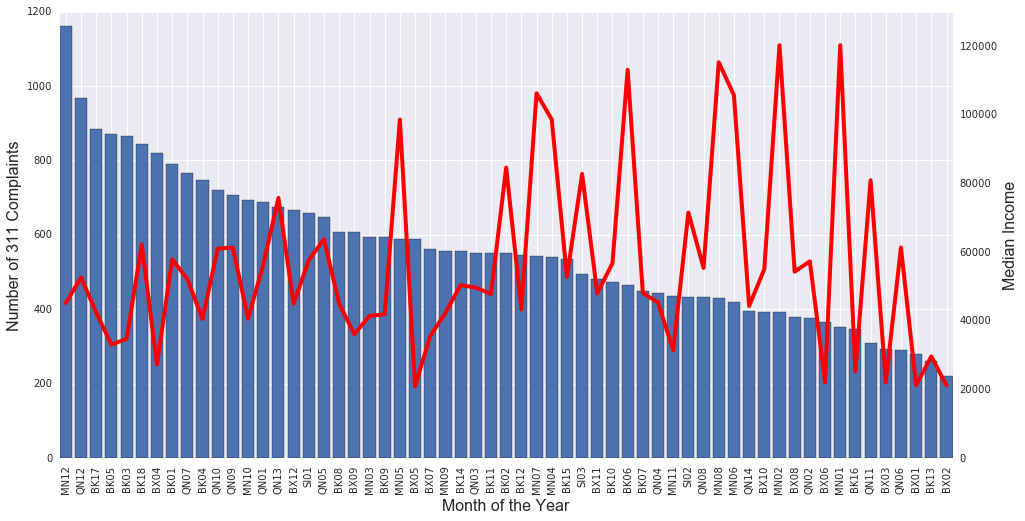

In [111]:
f, ax1 = plt.subplots(figsize=(16, 8))

x = range(0,len(df))
labels = df.cd_id

ax1.bar(x, df.complaints, align="center")
ax1.set_xlim(-1,len(df))
ax1.set_ylabel('Number of 311 Complaints', fontsize=16)
ax1.set_xlabel('Month of the Year', fontsize=16)

plt.xticks(x, labels, rotation='vertical')

ax2 = ax1.twinx()
ax2.plot(x, df.income_median, "r-", linewidth=4, label="Median Income")
ax2.set_ylabel('Median Income', fontsize=16)
ax2.grid(b=None)
ax2.set_ylim(0, 130000)

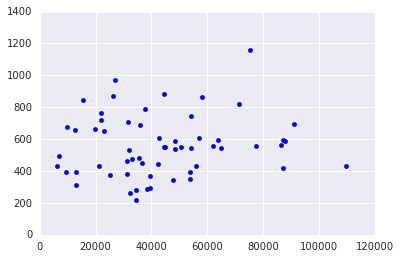

In [130]:
plt.scatter(df.population_density, df.complaints)

In [131]:
internetSmf = smf.ols(formula='complaints ~ population_density', data=df)
internetOls = internetSmf.fit()
print(internetOls.summary())

                            OLS Regression Results                            
Dep. Variable:             complaints   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6559
Date:                Mon, 07 Nov 2016   Prob (F-statistic):              0.421
Time:                        13:03:30   Log-Likelihood:                -393.05
No. Observations:                  59   AIC:                             790.1
Df Residuals:                      57   BIC:                             794.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            519.2755     52

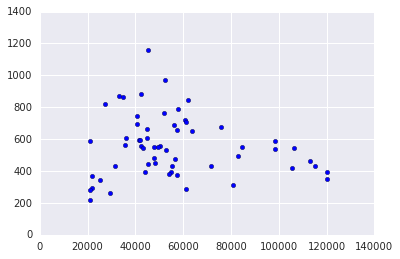

In [124]:
plt.scatter(df.income_median, df.complaints)

In [129]:
internetSmf = smf.ols(formula='complaints ~ income_median', data=df)
internetOls = internetSmf.fit()
print(internetOls.summary())

                            OLS Regression Results                            
Dep. Variable:             complaints   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7358
Date:                Mon, 07 Nov 2016   Prob (F-statistic):              0.395
Time:                        13:00:13   Log-Likelihood:                -393.01
No. Observations:                  59   AIC:                             790.0
Df Residuals:                      57   BIC:                             794.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       603.1171     59.616     10.117

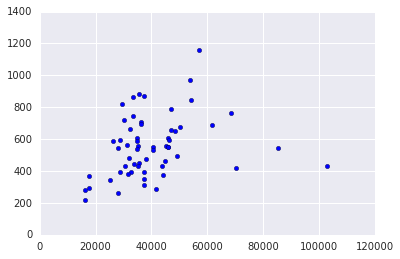

In [125]:
plt.scatter(df.with_internet, df.complaints)

In [127]:
internetSmf = smf.ols(formula='complaints ~ with_internet', data=df)
internetOls = internetSmf.fit()
print(internetOls.summary())

                            OLS Regression Results                            
Dep. Variable:             complaints   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     4.538
Date:                Mon, 07 Nov 2016   Prob (F-statistic):             0.0375
Time:                        12:55:00   Log-Likelihood:                -391.12
No. Observations:                  59   AIC:                             786.2
Df Residuals:                      57   BIC:                             790.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       419.4985     68.829      6.095

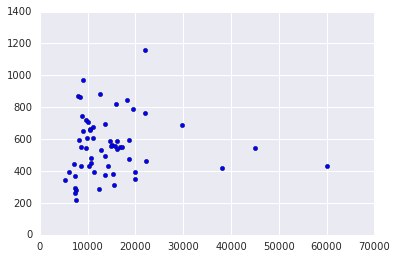

In [126]:
plt.scatter(df.mobile_broadband, df.complaints)

In [128]:
internetSmf = smf.ols(formula='complaints ~ mobile_broadband', data=df)
internetOls = internetSmf.fit()
print(internetOls.summary())

                            OLS Regression Results                            
Dep. Variable:             complaints   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.05925
Date:                Mon, 07 Nov 2016   Prob (F-statistic):              0.809
Time:                        12:59:31   Log-Likelihood:                -393.35
No. Observations:                  59   AIC:                             790.7
Df Residuals:                      57   BIC:                             794.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept          546.9286     47.435  

## Conclusion

Based on the p-values of the coefficients of median income, population density, internet access, and mobile broadband per Community District at $\alpha \leq 0.05$, we can say that Community Districts with a higher number of internet connected households submit more 311 complaints.